In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/VDeshmukhCemtrex/Datasets/main/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...,NaN,NaN,NaN
3934,ham,You need to get up. Now.,NaN,NaN,NaN
2493,ham,they released another Italian one today and it...,NaN,NaN,NaN
4144,ham,Lol I would but despite these cramps I like be...,NaN,NaN,NaN
1880,ham,Just seeing your missed call my dear brother. ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2642,ham,"They can try! They can get lost, in fact. Tee hee"
3158,ham,Are you up for the challenge? I know i am :)
787,spam,Ever thought about living a good life with a p...
2291,ham,Remind me how to get there and I shall do so
530,spam,PRIVATE! Your 2003 Account Statement for 07815...


In [7]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])

In [10]:
df.rename(columns={'v1':'target','v2':'data'},inplace=True)

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   data    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


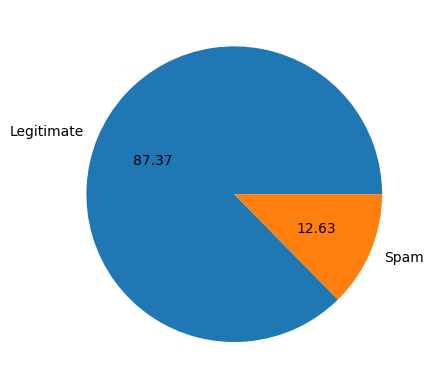

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Legitimate','Spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['char_count']=df['data'].apply(len)
df.head()

,target,data,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df['word_count'] = df['data'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()


,target,data,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['sentence_count'] = df['data'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,data,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df[df['target'] == 0][['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target'] == 1][['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
import seaborn as sns

<AxesSubplot: xlabel='char_count', ylabel='Count'>

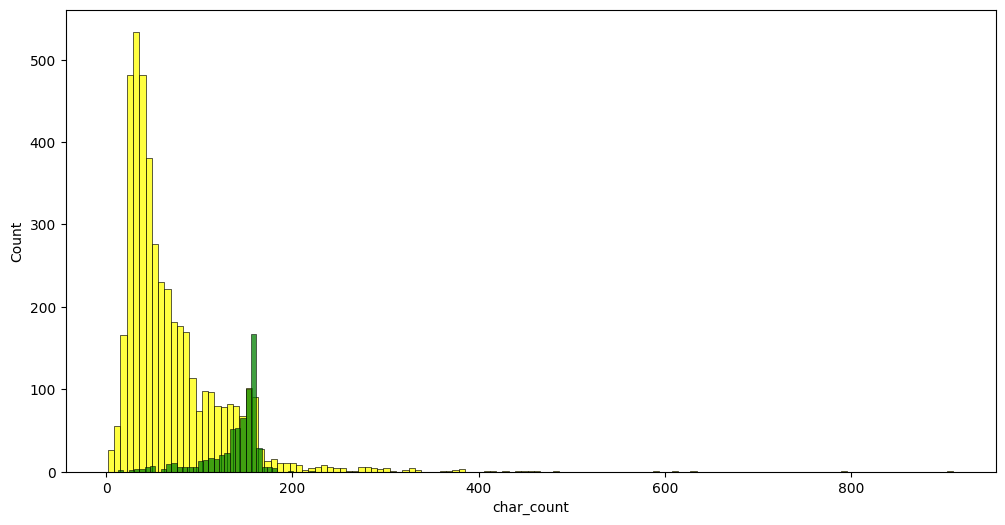

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['char_count'],color='yellow')
sns.histplot(df[df['target'] == 1]['char_count'],color='green')

<AxesSubplot: xlabel='word_count', ylabel='Count'>

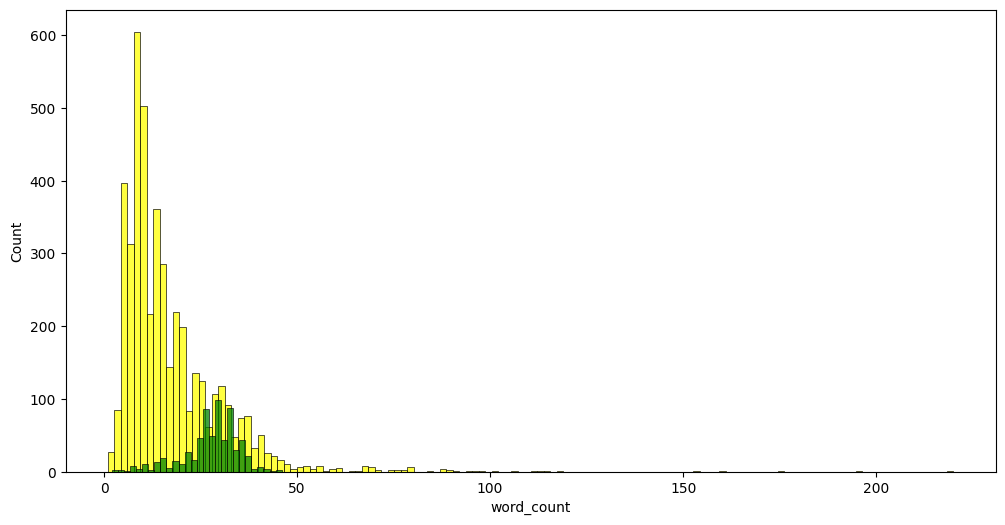

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['word_count'],color='yellow')
sns.histplot(df[df['target'] == 1]['word_count'],color='green')


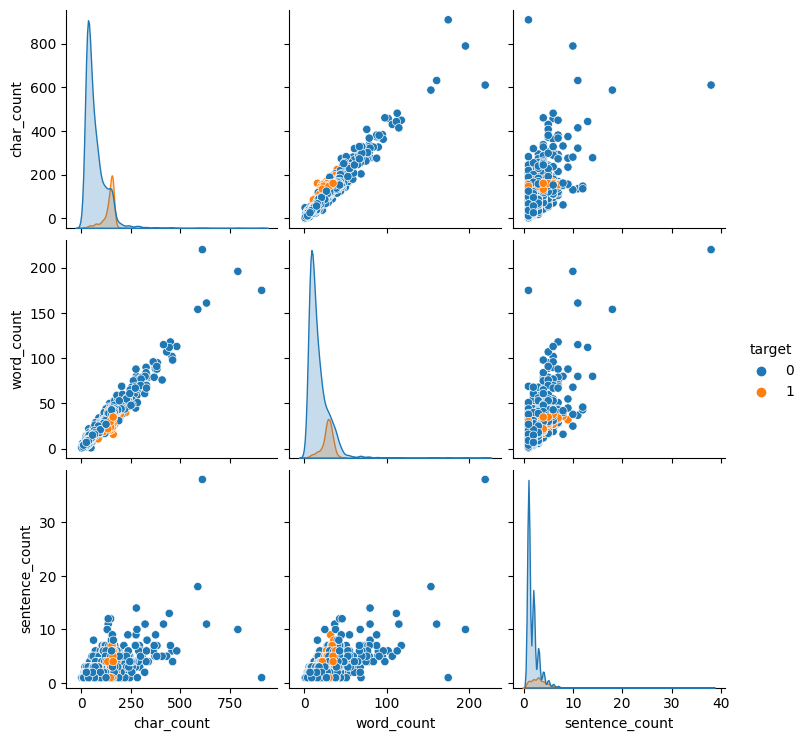

In [27]:
sns.pairplot(df,hue='target')

C:\Users\Admin\AppData\Local\Temp\ipykernel_552\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

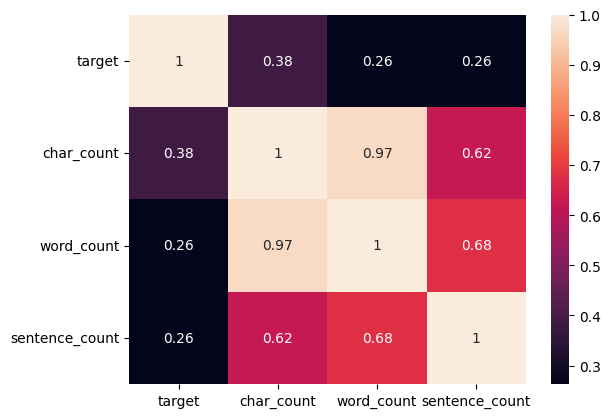

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
import string 
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [31]:
def transform_text(text):
    text = text.lower()
    #lower to lowercase text
    text = nltk.word_tokenize(text)
    #tokenize to split string into words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    #stem to get root word from the variant
            
    return " ".join(y)

In [32]:
df['data_processed'] = df['data'].apply(transform_text)
df.head()

,target,data,char_count,word_count,sentence_count,data_processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc

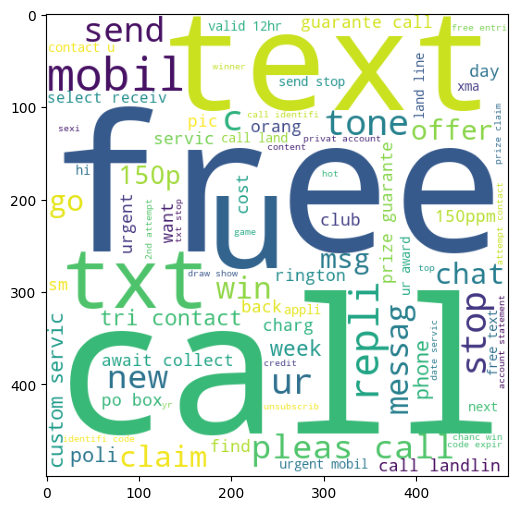

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['data_processed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

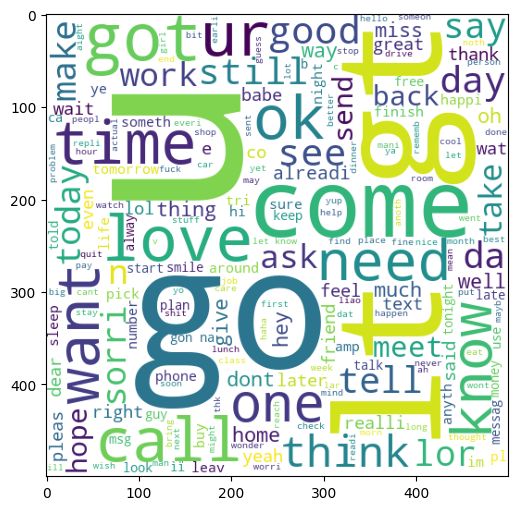

In [36]:
legitimate_wc = wc.generate(df[df['target'] == 0]['data_processed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(legitimate_wc)

In [37]:
#bunch all words from spam msg data
spam_corpus = []
for msg in df[df['target'] == 1]['data_processed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [38]:
from collections import Counter

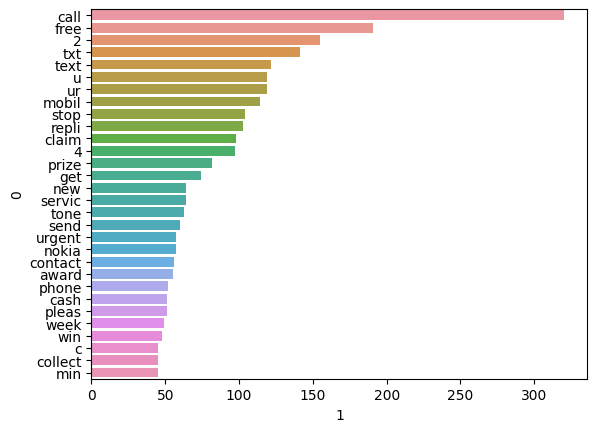

In [39]:
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='horizontal')
plt.show()

In [40]:
#bunch all words from legitimate msg data
legitimate_corpus = []
for msg in df[df['target'] == 0]['data_processed'].tolist():
    for word in msg.split():
        legitimate_corpus.append(word)
len(legitimate_corpus)

35404

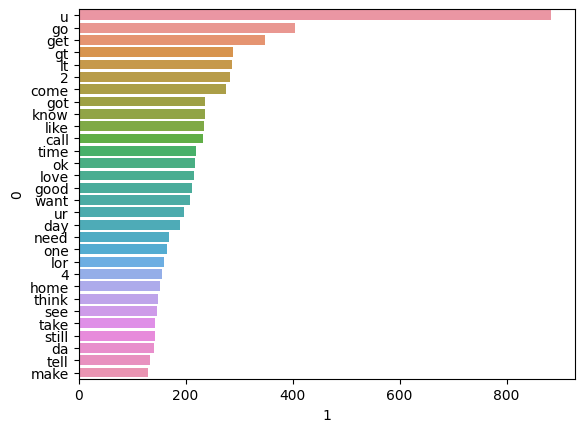

In [41]:
sns.barplot(y=pd.DataFrame(Counter(legitimate_corpus).most_common(30))[0],x=pd.DataFrame(Counter(legitimate_corpus).most_common(30))[1])
plt.xticks(rotation='horizontal')
plt.show()

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [99]:
# cv = CountVectorizer()
# X=cv.fit_transform(df['data_processed']).toarray()
# X

In [100]:
tfidfVec = TfidfVectorizer()
X=tfidfVec.fit_transform(df['data_processed']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
X.shape

(5169, 6708)

In [102]:
y = df['target'].values

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [107]:
gNB = GaussianNB()
mNB = MultinomialNB()
bNB = BernoulliNB()

In [108]:
gNB.fit(X_train,y_train)
gNB_pred = gNB.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,gNB_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,gNB_pred))
print('Precision Score: ',precision_score(y_test,gNB_pred))

Accuracy Score:  0.8762088974854932
Confusion Matrix: 
 [[793 103]
 [ 25 113]]
Precision Score:  0.5231481481481481


In [109]:
mNB.fit(X_train,y_train)
mNB_pred = mNB.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,mNB_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,mNB_pred))
print('Precision Score: ',precision_score(y_test,mNB_pred))

Accuracy Score:  0.9593810444874274
Confusion Matrix: 
 [[896   0]
 [ 42  96]]
Precision Score:  1.0


In [110]:
bNB.fit(X_train,y_train)
bNB_pred = bNB.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,bNB_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,bNB_pred))
print('Precision Score: ',precision_score(y_test,bNB_pred))

Accuracy Score:  0.9700193423597679
Confusion Matrix: 
 [[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


Observation:                    
We can see from GaussianNB, MultinomialNB and BernoulliNB
MultinomialNB as most precise i.e 1

Now we will check Accuracy and Precision for each regression and classification algorithms

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [113]:
classifiers={
    'SVC':svc,
    'KNeighborsC':knc,
    'MultiNBC':mnb,
    'DecisionTreeC':dtc,
    'LogisticR':lr,
    'RandomForestC':rfc,
    'AdaBoostC':abc,
    'BaggingC':bc,
    'ExtraTreesC':etc,
    'GradientBoostingC':gbc,
    'XGBC':xgbc
}

Create a function get Accuracy and Precision

In [114]:
def train_accuracy_precision(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [115]:
train_accuracy_precision(mnb,X_train,y_train,X_test,y_test)

(0.9593810444874274, 1.0)

In [121]:
accuracy = []
precision = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_accuracy_precision(clf, X_train,y_train,X_test,y_test)
    accuracy.append(current_accuracy)
    precision.append(current_precision)

In [122]:
performanceWideDF = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy,'Precision':precision}).sort_values('Precision',ascending=False)
performanceWideDF

,Algorithm,Accuracy,Precision
1,KNeighborsC,0.900387,1.000000
2,MultiNBC,0.959381,1.000000
5,RandomForestC,0.971954,1.000000
8,ExtraTreesC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoostC,0.961315,0.945455
4,LogisticR,0.951644,0.940000
10,XGBC,0.970019,0.934959
9,GradientBoostingC,0.952611,0.923810
7,BaggingC,0.958414,0.862595


We will convert wide dataframe to long using pandas.melt()

In [123]:
performanceLongDF = pd.melt(performanceWideDF, id_vars = "Algorithm")
performanceLongDF

,Algorithm,variable,value
0,KNeighborsC,Accuracy,0.900387
1,MultiNBC,Accuracy,0.959381
2,RandomForestC,Accuracy,0.971954
3,ExtraTreesC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoostC,Accuracy,0.961315
6,LogisticR,Accuracy,0.951644
7,XGBC,Accuracy,0.970019
8,GradientBoostingC,Accuracy,0.952611
9,BaggingC,Accuracy,0.958414


***************************

In [124]:
tfidfVec_300 = TfidfVectorizer(max_features=3000)
X_300=tfidfVec_300.fit_transform(df['data_processed']).toarray()
X_train_300,X_test_300,y_train_300,y_test_300 = train_test_split(X_300,y,test_size=0.2,random_state=2)

In [125]:
accuracy_300 = []
precision_300 = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_accuracy_precision(clf, X_train_300,y_train_300,X_test_300,y_test_300)
    accuracy_300.append(current_accuracy)
    precision_300.append(current_precision)

In [126]:
temp_df_300 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_max_ft_3000':accuracy_300,'Precision_max_ft_3000':precision_300}).sort_values('Precision_max_ft_3000',ascending=False)

In [127]:
new_df = performanceWideDF.merge(temp_df_300,on='Algorithm')

****************************************

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_300)
X_train_scaler,X_test_scaler,y_train_scaler,y_test_scaler= train_test_split(X_scaler,y,test_size=0.2,random_state=2)

In [130]:
accuracy_scaler = []
precision_scaler = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_accuracy_precision(clf, X_train_scaler,y_train_scaler,X_test_scaler,y_test_scaler)
    accuracy_scaler.append(current_accuracy)
    precision_scaler.append(current_precision)

In [131]:
temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_scaling':accuracy_scaler,'Precision_scaling':precision_scaler}).sort_values('Precision_scaling',ascending=False)

In [132]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [133]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KNeighborsC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,MultiNBC,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RandomForestC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ExtraTreesC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoostC,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LogisticR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,XGBC,0.970019,0.934959,0.967118,0.933333,0.967118,0.933333
8,GradientBoostingC,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BaggingC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


*********************************************************************

In [134]:
X_char = np.hstack((X_300,df['char_count'].values.reshape(-1,1)))

In [135]:
X_train_char,X_test_char,y_train_char,y_test_char= train_test_split(X_char,y,test_size=0.2,random_state=2)

In [136]:
accuracy_char = []
precision_char = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_accuracy_precision(clf, X_train_char,y_train_char,X_test_char,y_test_char)
    accuracy_char.append(current_accuracy)
    precision_char.append(current_precision)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_num_chars':accuracy,'Precision_num_chars':precision}).sort_values('Precision_num_chars',ascending=False)

In [138]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KNeighborsC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.900387,1.000000
1,MultiNBC,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.959381,1.000000
2,RandomForestC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.971954,1.000000
3,ExtraTreesC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.972921,0.982456
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.972921,0.974138
5,AdaBoostC,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.961315,0.945455
6,LogisticR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.951644,0.940000
7,XGBC,0.970019,0.934959,0.967118,0.933333,0.967118,0.933333,0.970019,0.934959
8,GradientBoostingC,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.952611,0.923810
9,BaggingC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.958414,0.862595


Observation:                          
As we can see best Accuracy and Precision can be found in TfidfVectorizer(max_features=3000)        
Also, MultinomialNB has the highest Precision with best Accuracy

Still we will check if combined algorithms works best, with top 3 i.e KNeighborsClassifier, RandomForestClassifier, MultinomialNB with the help of Voting classifier and Stacking Classifier

In [139]:
from sklearn.ensemble import VotingClassifier

In [141]:
voting = VotingClassifier(estimators=[('knc', knc), ('mnb', mnb), ('rfc', rfc)],voting='soft')
voting.fit(X_train_300,y_train_300)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('mnb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [144]:
y_pred_vote = voting.predict(X_test_300)
print("Accuracy",accuracy_score(y_test_300,y_pred_vote))
print("Precision",precision_score(y_test_300,y_pred_vote))

Accuracy 0.9535783365570599
Precision 1.0


In [145]:
from sklearn.ensemble import StackingClassifier

In [146]:
clf = StackingClassifier(estimators=[('knc', knc), ('mnb', mnb), ('rfc', rfc)])
clf.fit(X_train_300,y_train_300)
y_pred_stack = clf.predict(X_test_300)
print("Accuracy",accuracy_score(y_test_300,y_pred_stack))
print("Precision",precision_score(y_test,y_pred_stack))

Accuracy 0.9796905222437138
Precision 0.975609756097561


As we can see,                
TfidfVectorizer(3000)       | Voting                      | Stack                   
Accuracy 0.97 Precision 1.0 | Accuracy 0.95 Precision 1.0 | Accuracy 0.97 Precision 0.97      

Conclusion:             
Here we can conclude TfidfVectorizer(3000) has best Accuracy and Precision.

In [ ]:
import pickle
pickle.dump(tfidfVec,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))